In [1]:
import pandas as pd

А теперь проверим полученные знания на практике. 

Для выполнения практических заданий нам понадобится новый датасет.

In [2]:
heart = pd.read_csv('data/heart.csv', sep = ',')
display(heart)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


- age — возраст
- sex — пол (1 - мужчина, 0 - женщина)
- cp — тип боли в груди (4 значения)
- trestbps — артериальное давление в покое
- chol — холестерин сыворотки в мг/дл
- fbs — уровень сахара в крови натощак > 120 мг/дл
- restecg — результаты электрокардиографии в покое (значения 0,1,2)
- thalach — достигнута максимальная частота сердечных сокращений
- exang — стенокардия, вызванная физической нагрузкой
- oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
- slope — наклон пикового сегмента ST при нагрузке
- ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
- thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.

In [3]:
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)
heart['old'].sum()

np.int64(79)

Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.

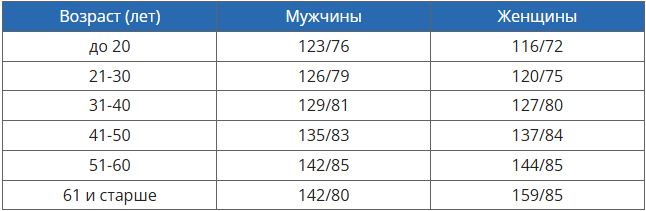

In [4]:
# Функция для определения возрастной группы
def get_age_group(age):
    if age <= 20:
        return 'до 20'
    elif 21 <= age <= 30:
        return '21-30'
    elif 31 <= age <= 40:
        return '31-40'
    elif 41 <= age <= 50:
        return '41-50'
    elif 51 <= age <= 60:
        return '51-60'
    else:
        return '61 и старше'

# Словарь с нормами давления (систолическое)
pressure_norms = {
    'до 20': {1: 123, 0: 116},      # 1 - мужчины, 0 - женщины
    '21-30': {1: 126, 0: 120},
    '31-40': {1: 129, 0: 127},
    '41-50': {1: 135, 0: 137},
    '51-60': {1: 142, 0: 144},
    '61 и старше': {1: 142, 0: 159}
}

# Создаем новый признак
heart['age_group'] = heart['age'].apply(get_age_group)
heart['trestbps_mean'] = heart.apply(lambda x: pressure_norms[x['age_group']][x['sex']], axis=1)
heart_tm = heart.drop('age_group', axis=1)
display(heart_tm)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,144
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,135
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,142
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,142


Закодируйте вышеперечисленные признаки методом OneHotEncoding из библиотеки Category Encoders, удалив исходные признаки. Параметр use_cat_names оставьте по умолчанию.

Сколько признаков получилось в датасете?

In [5]:
import category_encoders as ce

In [6]:
encoder = ce.OneHotEncoder(cols=['cp','restecg','slope','ca','thal'])
cols = encoder.fit_transform(heart_tm[['cp','restecg','slope','ca','thal']])
heart_OHE = pd.concat([heart_tm, cols], axis=1)
heart_OHE = heart_OHE.drop(['cp','restecg','slope','ca','thal'], axis=1)

In [7]:
display(heart_OHE)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,145,233,1,150,0,2.3,1,1,...,0,1,0,0,0,0,1,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,1,0,0,0,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,1,0,...,0,1,0,0,0,0,0,1,0,0
3,56,1,120,236,0,178,0,0.8,1,0,...,0,1,0,0,0,0,0,1,0,0
4,57,0,120,354,0,163,1,0.6,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,...,1,1,0,0,0,0,0,0,1,0
299,45,1,110,264,0,132,0,1.2,0,0,...,1,1,0,0,0,0,0,0,1,0
300,68,1,144,193,1,141,0,3.4,0,1,...,1,0,1,0,0,0,0,0,1,0
301,57,1,130,131,0,115,1,1.2,0,0,...,1,0,0,1,0,0,0,0,1,0


Нормализуйте все числовые признаки подходящим способом.

В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой.

In [8]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

<Axes: xlabel='trestbps_mean', ylabel='Count'>

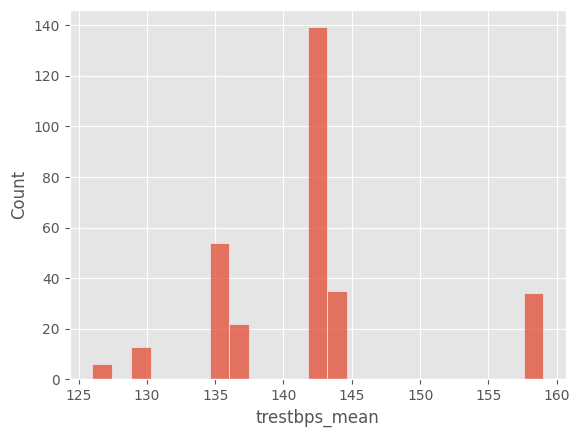

In [9]:
sns.histplot(heart_OHE['trestbps_mean'])

In [11]:
mm_scaler = preprocessing.MinMaxScaler() # без выбросов
r_scaler = preprocessing.RobustScaler() # с выбросами
#data['price'] = scaler.fit_transform(data[['price']])
heart_OHE['age'] = mm_scaler.fit_transform(heart_OHE[['age']])
heart_OHE['trestbps'] = r_scaler.fit_transform(heart_OHE[['trestbps']])
heart_OHE['chol'] = r_scaler.fit_transform(heart_OHE[['chol']])
heart_OHE['thalach'] = mm_scaler.fit_transform(heart_OHE[['thalach']])
heart_OHE['oldpeak'] = r_scaler.fit_transform(heart_OHE[['oldpeak']])
heart_OHE['trestbps_mean'] = r_scaler.fit_transform(heart_OHE[['trestbps_mean']])

display(heart_OHE.head(5))
print(heart_OHE['chol'].std().round(6))

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,0.708333,1,0.75,-0.110236,1,0.603053,0,0.9375,1,1,...,0,1,0,0,0,0,1,0,0,0
1,0.166667,1,0.00,0.157480,0,0.885496,0,1.6875,1,0,...,0,1,0,0,0,0,0,1,0,0
2,0.250000,0,0.00,-0.566929,0,0.770992,0,0.3750,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0.562500,1,-0.50,-0.062992,0,0.816794,0,0.0000,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.583333,0,-0.50,1.795276,0,0.702290,1,-0.1250,1,0,...,0,1,0,0,0,0,0,1,0,0


0.816232


Проведите корреляционный анализ и отберите признаки для будущей модели. Выберите пары сильно скоррелированных признаков.

<Axes: >

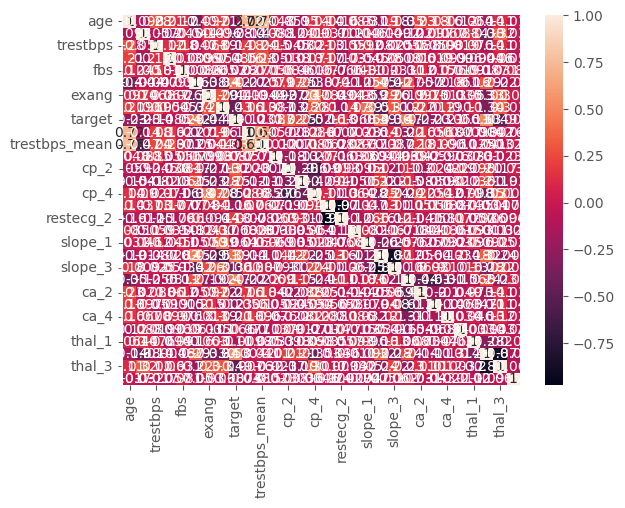

In [12]:
sns.heatmap(heart_OHE.corr(numeric_only=True), annot=True)

In [16]:
corr_matrix = heart_OHE.corr(numeric_only=True)
# Преобразуем матрицу в таблицу с тремя столбцами: [столбец1, столбец2, корреляция]
corr_pairs = corr_matrix.stack().reset_index()
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
# Убираем дубликаты (A-B и B-A — это одно и то же)
corr_pairs = corr_pairs[corr_pairs['Feature 1'] < corr_pairs['Feature 2']]
display(corr_pairs.sort_values(by="Correlation", ascending=False).head(20))

,Feature 1,Feature 2,Correlation
10,age,trestbps_mean,0.763055
9,age,old,0.718028
280,old,trestbps_mean,0.611538
267,target,thal_2,0.527334
426,cp_4,exang,0.469061
638,ca_1,target,0.465590
575,slope_2,thalach,0.448043
245,target,thalach,0.421741
228,oldpeak,slope_1,0.394253
578,slope_2,target,0.394066
